In [1]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, concatenate, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
from keras.layers.core import SpatialDropout2D
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
np.random.seed(101)

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
filelist_trainx_ph2 = sorted(glob.glob('isic-challenge-2016/ISIC2016_Task1_Training_Input/*.jpg'), key=numericalSort)
X_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainx_ph2])

filelist_trainy_ph2 = sorted(glob.glob('isic-challenge-2016/ISIC2016_Task1_Training_GroundTruth/*.png'), key=numericalSort)
Y_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainy_ph2])

In [88]:
import os
os.mkdir("isic-challenge-2016/out")

In [89]:
out = []
for i in range(len(X_train_ph2)):
    img2 = cv2.merge((Y_train_ph2[i],Y_train_ph2[i],Y_train_ph2[i]))/255.0 #to 3 channels
    z = X_train_ph2[i]/255.0 * img2 # get the segmentation out
    #swap RGB to BGR
    z = (z*255).astype('uint8')
    z=cv2.cvtColor(z, cv2.COLOR_RGB2BGR)
    np.append(out, z)
    save_image_path = f"isic-challenge-2016/out/{i}.jpg"
    cv2.imwrite(save_image_path,z)

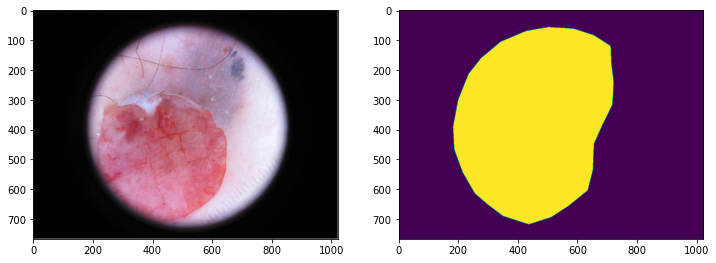

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(X_train_ph2[3])
plt.subplot(1,2,2)
#y = x*y
plt.imshow(Y_train_ph2[3]/255.0)
plt.show()

In [76]:
img3 = cv2.merge((Y_train_ph2[3],Y_train_ph2[3],Y_train_ph2[3]))/255.0

v = X_train_ph2[3]/255.0*img3

In [80]:
w = (v*255).astype('uint8')

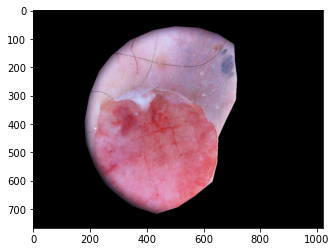

In [81]:
plt.imshow(w)

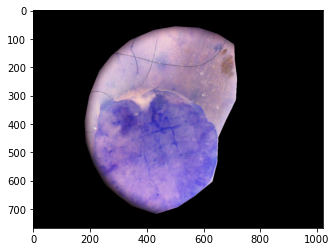

In [84]:
f=cv2.cvtColor(w, cv2.COLOR_RGB2BGR)
plt.imshow(f)

In [85]:
cv2.imwrite("3.jpg",f)

True

In [83]:
cv2.imwrite("2.jpg",w)

True

In [57]:
v=cv2.cvtColor(v.astype('float32'), cv2.COLOR_RGB2BGR)

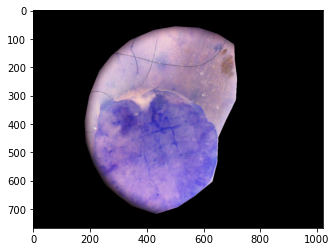

In [58]:
plt.imshow(v)

In [78]:
cv2.imwrite("1.bmp",(v*255).astype('uint8'))

True

In [82]:
w[500][500]

array([200, 109, 127], dtype=uint8)

In [25]:
v

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)